# Project 4
The data for this project is real data provided to us by the HPI School of Design Thinking. You are given as input a table stored in CSV format in a file named ‘project4.csv’. This table has 321 rows and five columns. Each row corresponds
to a student and the columns are as follows:

< hash > < Sex > < Discipline > < Nationality > < Semester >

- The < hash > field contains a cryptographic hash of the student’s name (for privacy reasons).
- The sex field contains ‘m’ for male and ‘f’ for female.
- The Discipline field contains one of the following seven entries:
    ‘Business’, ‘Creative Disciplines’, ‘Engineering’, ‘Humanities’, ‘Life Sciences’, ‘Media’ or ‘Social Sciences’.
- The Nationality field contains one of 37 nationalities, depending on the selfreported nationality of the student.
- The Semester field contains the semester in which that student was enrolled. This is stored as a code that indicates the semester and year. For example, the students in Winter 2015 semester have WT-15 (for Winter Term), and the students enrolled in this semester have the code ST-17.

In [1]:
import imp
import numpy as np
import pandas as pd
import itertools as it
import utils
import algorithms as algo
import metrics
from matplotlib import pyplot as plt
%matplotlib inline

students = pd.read_csv('project4.csv')

## Teaming 1 (Arbitrary teaming)

In [126]:
teaming1 = utils.process_semesters(students, algo.arbitrary_teaming)
utils.store_teaming(teaming1, "output/teaming1.out")

## Teaming 2 (Intra-team diversity)

#### Defining the multi objective problem

In [127]:
teaming1_metric = metrics.overall_multi_objective(teaming1)
metrics.print_metric(teaming1_metric, 'teaming 1')

Multi-objective metric for teaming 1: GenderBalance=0.29, Disciplines=0.38, Nationalities=0.63, Collision=0.00


#### Testing SEMO and visualizing Pareto Front
For pseudocode and optimization on SEMO see the slides of lecture 7

+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++.++++++++++++.+++++++++++++.++++++.+++++++.+++++++.+++++.+++++++++.+++++++
Best solution out of 16 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.04, Disciplines=0.13, Nationalities=0.61, Collision=0.00

Found 16 elements of the Pareto Front


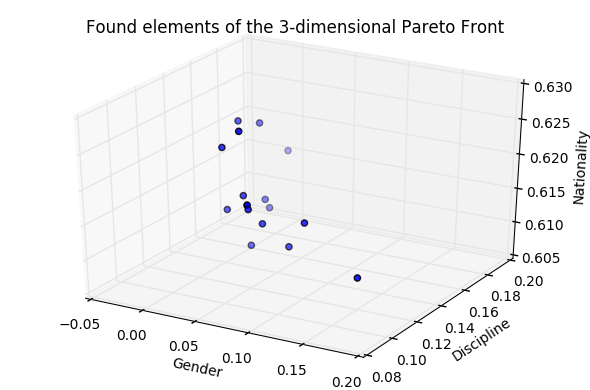

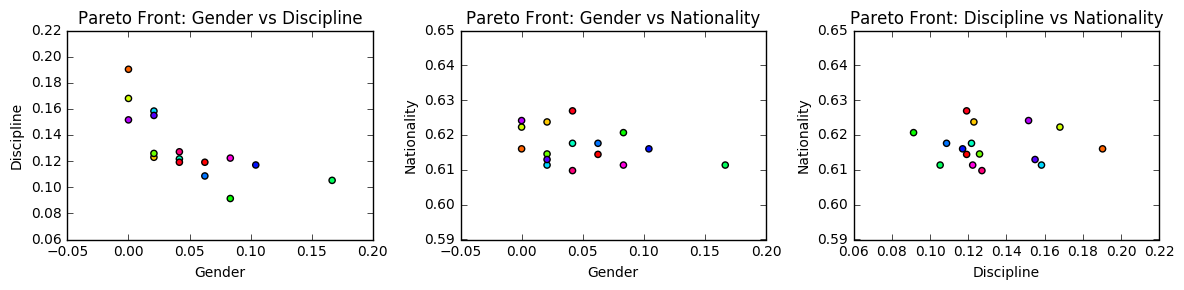

In [138]:
sem_students = students[students['Semester'] == 'WT-15']
P = algo.semo(sem_students, 'WT-15', debug=True, epochs=5000, mutation_intensity=10, precision=6)
print('\nFound {} elements of the Pareto Front'.format(len(P)))
utils.plot_pareto_front_3d(P, filename='output/pareto-3d-5000-10-6.pdf')
utils.plot_pareto_front_2d(P, filename='output/pareto-2d-5000-10-6.pdf')

+.++++++++++++++++++++++++++++++++.++++++++++.+++++++++++.++.+++++.+.+++.++++++.+++++.++
Best solution out of 18 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.06, Disciplines=0.14, Nationalities=0.61, Collision=0.00

Found 18 elements of the Pareto Front


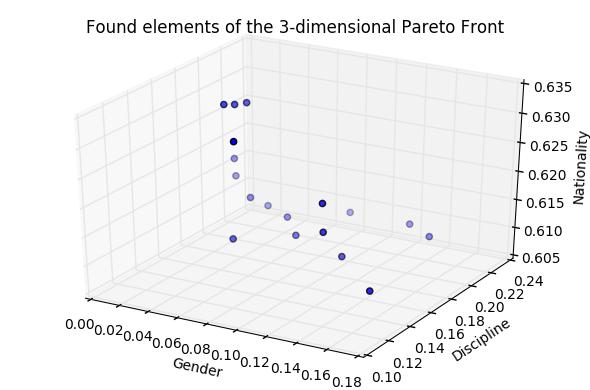

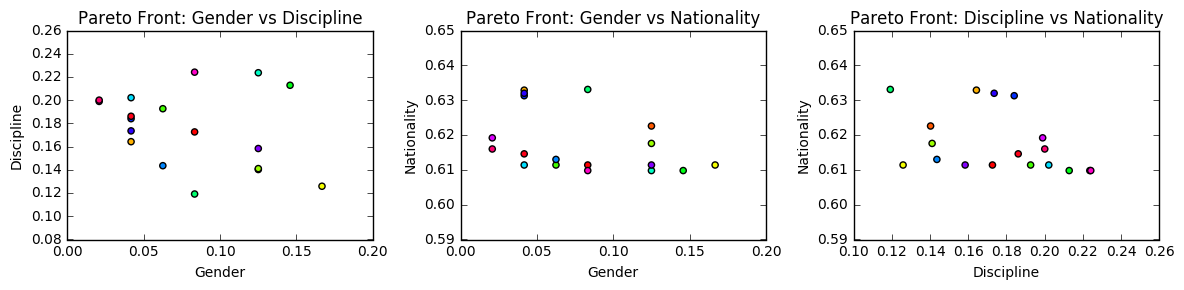

In [133]:
sem_students = students[students['Semester'] == 'WT-15']
P = algo.semo(sem_students, 'WT-15', debug=True, epochs=2000, mutation_intensity=20, precision=4)
print('\nFound {} elements of the Pareto Front'.format(len(P)))
utils.plot_pareto_front_3d(P, filename='output/pareto-3d-2000-20-4.pdf')
utils.plot_pareto_front_2d(P, filename='output/pareto-2d-2000-20-4.pdf')

#### Applying SEMO

In [134]:
teaming2 = utils.process_semesters(students, algo.semo, epochs=2000, mutation_intensity=20, precision=4)
utils.store_teaming(teaming2, "output/teaming2.out")

+.+++++++++++++++++++++++++++.++++.+++.+++++.++++++.+++++.+++++++.+++.++.+++
Best solution out of 15 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.10, Disciplines=0.14, Nationalities=0.61, Collision=0.00
+.++++++++++++++++++++++++++++++.+++++++++.+++++++.+++++.+.++.+++++.++.++.+++
Best solution out of 24 elements:
Multi-objective metric for semester ST-16: GenderBalance=0.06, Disciplines=0.18, Nationalities=0.62, Collision=0.00
+.++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++.++++++.+++++++++.+++++++.++++++.++++.+++.++++.+++++
Best solution out of 22 elements:
Multi-objective metric for semester WT-16: GenderBalance=0.06, Disciplines=0.14, Nationalities=0.55, Collision=0.00
.++++++++++++++++++++++++++++++++++++.+++++++++++++++.+++++.++++++++++.++.+++++.++++++.++++.++.++
Best solution out of 31 elements:
Multi-objective metric for semester ST-17: GenderBalance=0.03, Disciplines=0.16, Nationalities=0.71, Collision=0.00


In [135]:
teaming2_metric = metrics.overall_multi_objective(teaming2)
metrics.print_metric(teaming2_metric, 'teaming 2')

Multi-objective metric for teaming 2: GenderBalance=0.06, Disciplines=0.15, Nationalities=0.62, Collision=0.00


### Data analysis:

| Semester | Sex | Discipline | Nationality |
|:--------:|:----|:-----------|:------------|
| WT-15 | 34:46 | 18:06:23:10:10:11 | ? |
| ST-16 | 43:37 | 25:10:22:06:06:11 | ? |
| WT-16 | 42:38 | 20:10:23:03:06:18 | ? |
| ST-17 | 45:36 | 22:08:20:05:06:20 | ? |

The values are not equally distributed so we will have teams with more and some with less diversity.

## Teaming 3 (Inter-team diversity)

In [136]:
teaming3 = utils.process_semesters(students, algo.semo, epochs=2000,
                                   previous_teaming=teaming2, mutation_intensity=20,
                                   precision=4)
utils.store_teaming(teaming3, "output/teaming3.out")

+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++.+++++++++++++.+++++++++++.+++++++++.++++++++.++++.++++++++.+++.+++++++
Best solution out of 41 elements:
Multi-objective metric for semester WT-15: GenderBalance=0.04, Disciplines=0.16, Nationalities=0.61, Collision=0.04
+.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++.++++++++++++++++++++++.++++++++++++++++++++.++++++++++.+++++.++++++++++++.+++++.++++++++++
Best solution out of 41 elements:
Multi-objective metric for semester ST-16: GenderBalance=0.06, Disciplines=0.18, Nationalities=0.61, Collision=0.03
+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++.+++++++++++++++++.+++++++++++++++.+++++.++++++++.+++++++++++++.++++.++++++++++.+++++
Best solution out of 35 elements:
Multi-objective metric for semester WT-16: GenderBalance=0.06, Disciplines=0.16, Nationalities=0.54, 

In [137]:
teaming3_metric = metrics.overall_multi_objective(teaming3, previous_teaming=teaming2)
metrics.print_metric(teaming3_metric, 'teaming 3')

Multi-objective metric for teaming 3: GenderBalance=0.06, Disciplines=0.17, Nationalities=0.62, Collision=0.03


## Teaming 4 (Double inter-team diversity)

# Paper notes

Regarding the problem definition and selection of a fitting algorithm:

It might be that for one team of a semester the number of disciplines is in conflict with the number of nationalities. Therefore we assume that this multi-objective problem is a nontrivial one. A algorithm for this problem has to look for a nondominated (Pareto optimal) solution.

We've chosen the Simple Evolutionary Multi-objective Optimization (SEMO) algorithm proposed by [Laumanns et al.][0]




[0]: http://repository.ias.ac.in/83516/1/20-a.pdf